Importing the Libraries

In [17]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf 
from tensorflow.keras import layers


Loading the Dataset

In [18]:
(X_train, Y_train),(_,_)=tf.keras.datasets.mnist.load_data()

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
Y_train.shape

(60000,)

42820
8


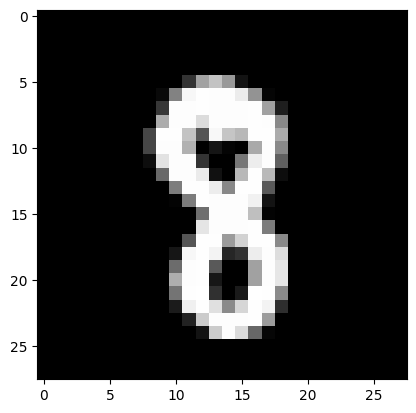

In [21]:
i = np.random.randint(0, 60000)
print(i)
print(Y_train[i])
plt.imshow(X_train[i], cmap='gray')

In [22]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [27]:
X_train=(X_train-127.5)/127.5

In [28]:
X_train[0].min(), X_train[0].max()

(-1.0078431, -0.99215686)

In [29]:
buffer_size=60000
batch_size=256

In [30]:
buffer_size/batch_size

234.375

In [31]:
type(X_train)

numpy.ndarray

In [32]:
X_train=tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

2024-03-16 10:12:32.718538: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


In [33]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [34]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

Building the generator


In [47]:
from keras.layers import LeakyReLU


def build_generator():
    network=tf.keras.Sequential()

    
    network.add(layers.Dense(units=7*7*256, use_bias=False, input_shape=(100,)))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    network.add(layers.Reshape((7,7,256)))

    # 7x7x128
    network.add(layers.Conv2DTranspose(filters=128, kernel_size=(5,5), padding='same', use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 14x14x64
    network.add(layers.Conv2DTranspose(filters=64, kernel_size=(5,5), padding='same', strides= (2,2), use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 28x28x1
    network.add(layers.Conv2DTranspose(filters=1, kernel_size=(5,5), padding='same',strides=(2,2) ,use_bias=False, activation='tanh'))
    
    network.summary()

    return network

In [48]:
generator= build_generator()

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [49]:
noise=tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-2.0861452e+00, -4.2484087e-01,  4.6971348e-01,  1.3940513e+00,
        -1.2364831e+00,  3.3197220e-02,  5.1577073e-01, -6.1518675e-01,
         6.9083625e-01, -1.0039181e+00, -5.1333773e-01,  1.5487031e+00,
         3.5231155e-01,  3.4341210e-01,  7.9862344e-01, -1.2622164e+00,
        -1.1375953e+00,  1.0892915e-01, -1.8306136e-01,  1.7018560e+00,
        -1.3886970e-01,  7.5299555e-01, -2.1158288e+00, -1.8845364e+00,
        -6.2070668e-01,  3.0854133e-01, -5.2731073e-01, -9.2016977e-01,
        -3.9960727e-01,  1.4926883e+00,  4.6555001e-01,  6.3776178e-04,
         5.7599950e-01, -1.3553970e+00,  1.7012457e+00,  8.8997447e-01,
        -8.7022644e-01, -4.4912988e-01,  1.9682534e-01, -8.3717811e-01,
        -1.3618751e+00, -5.5532551e-01, -5.2754360e-01, -2.0657054e-01,
        -2.4611786e-01,  5.3159308e-01,  1.3100376e+00, -1.4858047e+00,
        -1.2045575e+00,  4.0787181e-01,  3.0268508e-01,  2.9373029e-01,
        -3.805

In [52]:
generated_image=generator(noise, training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

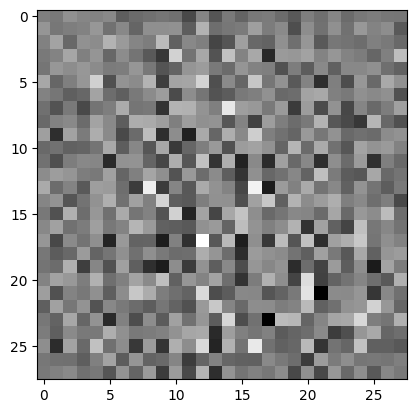

In [55]:
plt.imshow(generated_image[0,:,:,0], cmap='gray')

Building the discriminator

In [58]:
def build_discrimininator():
    network=tf.keras.Sequential()

    # 14x14x64
    network.add(layers.Conv2D(filters=64, strides=(2,2), kernel_size=(5,5), padding='same', input_shape=[28,28,1]))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    # 7x7x128
    network.add(layers.Conv2D(filters=128, strides=(2,2), kernel_size=(5,5), padding='same'))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    network.add(layers.Flatten())
    network.add(layers.Dense(1))

    network.summary()
    return network

In [59]:
discriminator=build_discrimininator()

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
discriminator(generated_image, training=False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00298001]], dtype=float32)>

In [61]:
tf.sigmoid(-0.00298001)

<tf.Tensor: shape=(), dtype=float32, numpy=0.499255>

Error Calculation

In [62]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [63]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [64]:
def discriminator_loss(expected_output, fake_output):
    real_loss=cross_entropy(tf.ones_like(expected_output), expected_output)
    fake_loss=cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss= real_loss + fake_loss
    return total_loss

In [81]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)

In [82]:
generator_optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

Training the GAN and Visualising the results

In [83]:
epochs=100
noise_dimension= 100
number_of_images= 16


In [84]:
batch_size, noise_dimension

(256, 100)

In [89]:
@tf.function
def train(images):
    noise= tf.random.normal([batch_size, noise_dimension])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images= generator(noise, training=True)

        expected_output= discriminator(images, training= True)
        fake_output= discriminator(generated_images, training=True)

        gen_loss= generator_loss(fake_output)
        disc_loss= discriminator_loss(expected_output, fake_output)

    generator_gradients= gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients= disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

In [90]:
test_images= tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [91]:
def train_gan(dataset, epochs, test_images):
    for epoch in range(epochs):
        for image_batch in dataset:
            
            train(image_batch)
        print('Epoch:',  epoch + 1)
        generated_images= generator(test_images, training=False)
        fig=plt.figure(figsize==(10,10))
        for i in range(generated_images.shape[0]):
            plt.subplot(4,4,i+1)
            plt.imshow(generated_images[i,:,:,0] * 127.5 + 127.5, cmap='gray')
            plt.axis('off')
        plt.show()


In [92]:
train_gan(X_train, epochs, test_images)

KeyboardInterrupt: 